# Eulers metode

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Dato: **27. oktober 2025**

## Eulers eksplisitte metode

Vi skal se på følgende initialverdiproblem:

\begin{align*}
\begin{cases}
y'(t)=F(t,y(t)),& \qquad t\in(t_0,t_{\text{end}}],\\
y(t_0)=y_0.
\end{cases}
\end{align*}

Vi deler nå opp intervallet $[t_0,t_{\text{end}}]$ i like store deler. For $N\in \mathbb{N}$, definerer vi altså steglengden $h$ og nodene $t_n$ ved

$$
h=\dfrac{t_{\text{end}}-t_0}N\qquad \text{og}\qquad t_{n+1}=t_n+h\qquad\text{for $n=0,1,\dots,N-1$,}
$$

hvor $t_{\text{end}}=t_N$.

Anvend så Taylors teorem på $y(t)$ om punktet $t=t_0$:

$$
y(t_0 + h) = y(t_0) + h y'(t_0) + \frac{1}{2}h^2 y''(\xi)
\qquad\text{for $\xi\in(t_0,t_1)$.}
$$

For små steglengder $h$ og begrensede $y''(t)$, har vi at

$$
y(t_1) = y(t_0+h) \approx y(t_0) + h y'(t_0) = y_0 + h F(t_0, y_0) =: y_1.
$$

Altså har vi brukt lineær tilnærming til å approksimere verdien $y(t_1)$ ved hjelp av $y_1$. 

Vi finner $y_{n+1}=y(t_{n+1})$, for $n=0,1,\dots,N-1$, på tilsvarende måte:

\begin{align*}
y_{n+1}&=y_n + h F(t_n,y_n),\\
t_{n+1}&=t_n+h.
\end{align*}

La oss nå implementere dette i python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def euler_eksplisitt(F, t, y, h):
    # ett steg med Eulers eksplisitte metode
    y = y + h*F(t, y)
    t = t + h
    return t, y

In [2]:
def ode_løser(F, t0, tend, y0, h, metode=euler_eksplisitt):
    # Generisk numerisk løser for ordinære differensialligninger
    #    y' = F(t,y), y(t0)=y0
    # Input: F, integrasjonsintervallet t0 og tend, 
    #        steglengden h og metoden vi velger  
    #   
    # Output: array-er med t- og y-verdiene. 
    
    y_num = np.array([y0])    # array for den numeriske løsningen y 
    t_num = np.array([t0])    # array for t-verdiene

    tn = t0                
    yn = y0 

    # hovedløkka
    while tn < tend - 1.e-10:            # vi kjører mens vi er strengt mindre enn t_end        
        tn, yn = metode(F, tn, yn, h)    # ett steg med metoden vi velger
        
        # utvider array-ene for t and y
        y_num = np.concatenate((y_num, np.array([yn])))
        t_num = np.append(t_num,tn)
        
    return t_num, y_num

#### Eksempel

Vi skal nå finne den numeriske løsningen av initialverdiproblemet

\begin{align*}
\begin{cases}
y'(t)=-2ty(t),& \qquad t\in(0,1],\\
y(0)=1
\end{cases}
\end{align*}

ved hjelp av Eulers eksplisitte metode. Den eksakte løsningen er $y(t)=e^{-t^2}$.

Vi prøver med steglengdene  $h=0.1$, $h=0.05$ og $h=0.025$, og vi sammenligner så med den eksakte løsningen.

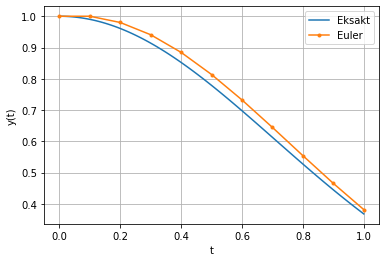

In [3]:
# vi definerer høyresiden
def F(t, y):
    return -2*t*y

# den eksakte løsningen
def y_eksakt(t):
    return np.exp(-t**2)

t0 = 0                        # første tidspunkt
tend = 1                      # siste tidspunkt
y0 = 1                        # initialverdien for y
h = 0.1                       # steglengden, prøv med andre verdier her

# vi løser ligningen
t_num, y_num = ode_løser(F, t0, tend, y0, h)

# vi plotter den eksakte løsningen
t = np.linspace(t0, tend, 101)
plt.plot(t, y_eksakt(t))

# vi plotter den numeriske løsningen
plt.plot(t_num, y_num, '.-')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend(['Eksakt', 'Euler']);

## Feilanalyse for Eulers eksplisitte metode

Vi lar nå feilen være gitt som

$$
e_n = |y(t_n)-y_{n}|,\qquad\text{for $n=0,1,\ldots,N$.}
$$

max_n e_n =  0.03480305692859509


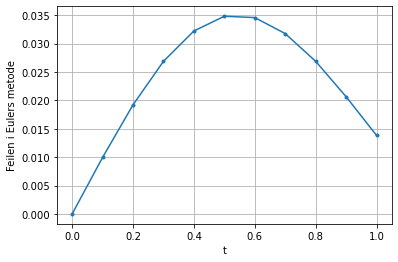

In [4]:
feil = abs(y_eksakt(t_num)-y_num)           # feilen er gitt som differansen mellom eksakt og numerisk løsning
plt.plot(t_num, feil, '.-')
plt.xlabel('t')
plt.ylabel('Feilen i Eulers metode')
plt.grid(True)
print("max_n e_n = ", max(feil))            # vi skriver ut feilen målt som den største differansen

La oss nå undersøke hvordan feilen oppfører seg ved å lage en tabell:

In [5]:
h = 0.1                     # steglengde
t0, tend = 0, 1             # integrasjonsintervall
y0 = 1                      # initialverdi

print('i    h                 e_N         y_num\n---------------------------------------------')

for i in range(10):
    t_num, y_num = ode_løser(F, t0, tend, y0, h)    # løser ligningen
    feil = abs(y_eksakt(tend)-y_num[-1])            # feilen i endepunktet tend
    print(format('{:}    {:.3e}        {:.3e}      {:.8}'.format( i, h, feil, float(y_num[-1]))))        
    h = 0.5*h                                       # reduserer steglengden

i    h                 e_N         y_num
---------------------------------------------
0    1.000e-01        1.383e-02      0.38170668
1    5.000e-02        6.505e-03      0.37438402
2    2.500e-02        3.157e-03      0.3710364
3    1.250e-02        1.555e-03      0.36943486
4    6.250e-03        7.720e-04      0.36865147
5    3.125e-03        3.846e-04      0.36826405
6    1.563e-03        1.920e-04      0.36807139
7    7.813e-04        9.589e-05      0.36797533
8    3.906e-04        4.792e-05      0.36792736
9    1.953e-04        2.396e-05      0.3679034


For hver iterasjon $i$, halverer vi $h$, og vi ser at $e_N$ også blir halvert. Tilsynelatende har vi derfor at

$$
e_N = |y(t_{\text{end}})-y_N|\approx Ch.
$$

La oss analysere dette nærmere. På grunn av Taylor-utviklingen vi gjorde tidligere, og definisjonen av $y_n$, har vi at

$$
y(t_n)-y_n = y(t_{n-1}+h)-y_n = \Big(y(t_{n-1}) + h y'(t_{n-1}) + \frac{1}{2}h^2 y''(\xi)\Big)-\Big(y_{n-1} + h F(t_{n-1},y_{n-1})\Big),
$$

for $\xi\in(t_{n-1},t_{n})$. Hvis vi nå antar at metoden var eksakt i forrige steg $y_{n-1}=y(t_{n-1})$ og at ligningen holder $y'(t_{n-1})=F(t_{n-1},y(t_{n-1}))$, får vi

$$
y(t_n)-y_n=\frac{1}{2}h^2 y''(\xi)\qquad \text{eller} \qquad e_n=\frac{1}{2}h^2 |y''(\xi)|\leq \frac{1}{2}h^2\max_{t\in[t_0,t_{\text{end}}]}|y''(t)|\leq Ch^2.
$$

Her får vi at feilen $e_N\approx Ch^2$, men dette var under forutsetning av at metoden var eksakt i steget $e_{N-1}$. For å få den faktiske feilen må vi gjøre en dypere analyse, som vi ikke går nærmere inn på her.

---

**Definisjon.** Vi sier at metoden er konsistent, altså at metoden faktisk løser problemet, dersom

$$
\lim_{h\to0+}\frac{e_n}{h}=0.
$$

---

Eulers eksplisitte metode er altså konsistent.

---

**Bemerkning.** En betingelse som er fristende å bruke er

$$
\lim_{h\to0+}e_n=0,
$$

men dette er oppfylt for fine nok funksjoner $y(t)$, uavhengig av om de løser initialverdiproblemet eller ikke:

\begin{align*}
e_n=|y(t_n)-y_n| &= |y(t_{n-1}+h)-y_n| = \Big|\Big(y(t_{n-1}) + h y'(\xi)\Big)-\Big(y(t_{n-1})+hF(t_{n-1},y(t_{n-1}))\Big)\Big|\\
&\leq h \Big(|y'(\xi)|+|F(t_{n-1},y(t_{n-1})|\Big).
\end{align*}

---

Legg merke til et første ordens polynom $y(t)=at+b$ løser $y'(t)=a$. Da er $y''(t)=0$ og $e_n=0$. Hvis derimot $y(t)=at^2+bt+c$, altså et andre ordens polynom, vil $y''(t)=2a\neq0$ og $e_n=ah^2$.

---

**Definisjon.** Vi sier at metoden har orden $m$ dersom $e_n=O(h^{m+1})$.

---

Vi ser derfor at Eulers eksplisitte metode har orden lik 1. Metoden er altså eksakt for første ordens polynomer.

---

**Bemerkning.** En metode med orden $m>0$ er altså konsistent.

---

## Eulers implisitte metode

Vi fortsetter med det samme initialverdiproblemet:

\begin{align*}
\begin{cases}
y'(t)=F(t,y(t)),& \qquad t\in(t_0,t_{\text{end}}],\\
y(t_0)=y_0.
\end{cases}
\end{align*}

Vi beholder også steglengden $h$ og nodene $t_n$:

$$
h=\dfrac{t_{\text{end}}-t_0}N\qquad \text{og}\qquad t_{n+1}=t_n+h\qquad\text{for $n=0,1,\dots,N-1$.}
$$

Men vi finner $y_{n+1}=y(t_{n+1})$, for $n=0,1,\dots,N$, på følgende måte:

\begin{align*}
y_{n+1}&=y_n + h F(t_{n+1},y_{n+1}),\\
t_{n+1}&=t_n+h.
\end{align*}


La oss analysere metoden ved hjelp av Taylors teorem anvendt på $y(t_n-h)$,

$$
y(t_{n-1})=y(t_{n}-h)=y(t_{n}) - h y'(t_n) + \frac{1}{2}h^2 y''(\xi), \qquad \text{for $\xi\in(t_{n-1},t_n)$.}
$$

slik at vi ved å anta at $y(t_{n-1})=y_{n-1}$ får

\begin{align*}
y(t_n)-y_{n} &= \Big(y(t_{n-1}) + h F(t_{n},y(t_{n})) - \frac{1}{2}h^2 y''(\xi)\Big)-\Big(y(t_{n-1})+hF(t_{n},y_n)\Big)\\
&=h\Big(F(t_{n},y(t_{n}))-F(t_{n},y_n)\Big)-\frac{1}{2}h^2 y''(\xi).
\end{align*}

For å fortsette må vi anta at $F(t,y(t))=F(y(t))$. Da kan vi bruke middelverditeoremet på $F(y(t))$:

$$
F(t_{n},y(t_{n}))-F(t_{n},y_n)=F(y(t_{n}))-F(y_n)=F'(\zeta)(y(t_n)-y_n),\qquad\text{for $\zeta$ mellom $y_n$ og $y(t_n)$.}
$$

Dermed får vi

$$
(1-hF'(\zeta))(y(t_n)-y_n))=-\frac{1}{2}h^2 y''(\xi)\qquad\Longleftrightarrow\qquad y(t_n)-y_n)=-\frac{\frac{1}{2}h^2 y''(\xi)}{1-hF'(\zeta)},
$$

eller

\begin{align*}
e_n \leq \frac{\frac{1}{2}h^2 |y''(\xi)|}{|1-hF'(\xi)|}\leq \frac{1}{2}h^2 |y''(\xi)|,\qquad\text{for $h$ liten nok og $|F'(\zeta)|$ begrenset.}
\end{align*}

Eulers implisitte metode har altså orden lik 1 den også, og er dermed konsistent.

Det er ikke like enkelt å implementere Eulers implisitte metode siden vi har $y_{n+1}$ både på venstre og høyre side av likheten. Verdien $y_{n+1}$ er altså gitt implisitt. 

Hvis vi nå antar at $F(t,y)=F(y)$, kan vi gjøre følgende: La $y_{n+1}=x$, da får vi

$$
x = y_n + hF(x) \qquad \Longleftrightarrow \qquad 0 = -x + y_n + hF(x) =: f(x).
$$

Vi kan altså finne $x=y_{n+1}$ ved å finne nullpunktet til funksjonen $f(x)$. Dette kan vi f. eks. gjøre med Newtons metode: Gitt $a_0=y_n$, får vi

$$
a_{n+1} = a_n - \frac{f(a_n)}{f'(a_n)} = a_n - \frac{hF(a_n)-a_n+a_0}{hF'(a_n)-1}.
$$

Prøv gjerne å implementere Eulers implisitte metode.

## Ustabilitet i Eulers eksplisitte metode

Selv om de to metodene vi har sett på har lik orden, er Eulers implisitte metode av og til å foretrekke siden den er mer stabil enn Eulers eksplisitte metode. Den implisitte metoden er selvsagt dyrere å implementere, og derfor kan det være greit å bruke Eulers eksplisitte metode også. Vi skal ikke gå videre inn i analysen av akkurat denne problemstillingen, men vi ønsker å belyse det hele med et eksempel hvor Eulers eksplisitte metode ikke nødvendigvis fungerer så bra.

La oss se på følgende initialverdiproblem:

\begin{align*}
\begin{cases}
y'(t)=-y(t),& \qquad t\in(0,10],\\
y(0)=1.
\end{cases}
\end{align*}

Den eksakte løsningen er $y(t)=e^{-t}$, og denne går ganske raskt mot null når $t$ vokser. La videre 

$$
h = \frac{10-0}{5}=2 \qquad\text{og}\qquad t_0=0,\ t_1=2,\ t_2=4,\ t_3=6,\ t_4=8,\ t_5=10.
$$

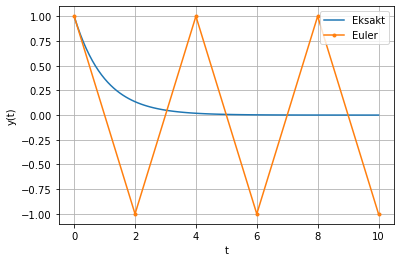

In [6]:
# vi definerer høyresiden
def G(t, y):
    return -y

# den eksakte løsningen
def Y_eksakt(t):
    return np.exp(-t)

t0 = 0                        # første tidspunkt
tend = 10                     # siste tidspunkt
y0 = 1                        # initialverdien for y
h = 2                         # steglengden, prøv med andre verdier her

# vi løser ligningen
t_num, y_num = ode_løser(G, t0, tend, y0, h)

# vi plotter den eksakte løsningen
t = np.linspace(t0, tend, 101)
plt.plot(t, Y_eksakt(t))

# vi plotter den numeriske løsningen
plt.plot(t_num, y_num, '.-')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend(['Eksakt', 'Euler']);

La oss se nærmere på feilen $e_N$:

In [7]:
h = 8                       # steglengde
t0, tend = 0, 10            # integrasjonsintervall
y0 = 1                      # initialverdi

print('i    h                 e_N         y_num\n---------------------------------------------')

for i in range(10):
    t_num, y_num = ode_løser(G, t0, tend, y0, h)    # løser ligningen
    feil = abs(Y_eksakt(tend)-y_num[-1])            # feilen i endepunktet tend
    print(format('{:}    {:.3e}        {:.3e}      {:.8}'.format( i, h, feil, float(y_num[-1]))))        
    h = 0.5*h                                       # reduserer steglengden

i    h                 e_N         y_num
---------------------------------------------
0    8.000e+00        4.900e+01      49.0
1    4.000e+00        2.700e+01      -27.0
2    2.000e+00        1.000e+00      -1.0
3    1.000e+00        4.540e-05      0.0
4    5.000e-01        4.445e-05      9.5367432e-07
5    2.500e-01        3.534e-05      1.0056585e-05
6    1.250e-01        2.246e-05      2.2942685e-05
7    6.250e-02        1.264e-05      3.2764551e-05
8    3.125e-02        6.697e-06      3.8703386e-05
9    1.562e-02        3.446e-06      4.195351e-05


Fra tabellen ser vi at hvis vi velger steglengden $h$ liten nok, vil feilen bli mindre også her. Vi kan selvsagt kvantifisere hva liten nok egentlig er, men altså ikke i TMA4400.